2 models for Intents with & without Over sampling(SMOTE)- Taken >50 count

In [5]:
#!pip install tensorflow==2.3.0 --index-url https://artifactory.alight.com/artifactory/api/pypi/python-pypi-remote/simple
!pip --proxy=http://proxycachest.hewitt.com:3228 install tensorflow==2.3.0
!pip list

  Using cached tensorflow-2.3.0-cp36-cp36m-manylinux2010_x86_64.whl (320.4 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2

In [3]:
#pip show tensorflow

Note: you may need to restart the kernel to use updated packages.


In [36]:
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [65]:
pwd

'/root/PDrvr_13Aug21'

In [38]:
import pandas as pd

df=pd.read_csv('/root/PDrvr_13Aug21/Data/df_PDrvr_13Aug2021_V1_1.csv',usecols=['primary driver','transcript'],low_memory=True)
df


,transcript,primary driver
0,morning calling popsicle benefit center sam he...,ELIGIBILITY
1,welcome express script dorothy express script ...,REFERRALS/TRANSFERS
2,calling well mark last name recorded line apri...,SPENDING ACCOUNTS
3,calling benefit support center charlotte help ...,SPENDING ACCOUNTS
4,calling center benefit specialist sneaking las...,INVESTMENTS
...,...,...
130513,looking employee benefit stage trying law game...,NAVIGATION/TROUBLESHOOTING
130514,calling name aaron last name checking tire jam...,COBRA
130515,calling benefit center lucy message name jc be...,DB&P
130516,le kelly kerry culture pine question regarding...,DB&P


In [39]:
df['transcript'][2496]

'calling cray benefit center angel speaking system today used work call guy called last week rolled new employer call provide rollover information said call back day tell guy send check basically eric check rollover hear better say full name recorded line brian going nyc dc plan see cdc correct alright perfect account number ending probably last forever social something list alright know told last time gonna read information regarding payment right stone tax stuff remember rollover non taxable advance reality allowed read guy applies turn requested read information either way alright fresh training relax proceed question know start received tape full payment right notice became eligible plan received summary payment ride latest squarely notice indicates rollover option special tax rule associated payment right review information proceed payment need reevaluate summary payment right even tell alright boy thing according federal law thirty day consider payment right taxable money eligibl

In [40]:
df.shape

(130518, 2)

In [41]:
df[df['transcript'].isna()]

,transcript,primary driver
748,NaN,NAVIGATION/TROUBLESHOOTING
5015,NaN,AUTHENTICATION
5748,NaN,CALL CONNECTION ISSUES
8229,NaN,MISDIRECTED CALL
12674,NaN,COMMUNICATIONS
...,...,...
121983,NaN,ELIGIBILITY
122371,NaN,NAVIGATION/TROUBLESHOOTING
123872,NaN,CALL CONNECTION ISSUES
127635,NaN,SPENDING ACCOUNTS


In [42]:
transcript_null_index=list(df[df['transcript'].isna()].index)
transcript_null_index

[748,
 5015,
 5748,
 8229,
 12674,
 13637,
 13821,
 14646,
 17017,
 18142,
 18520,
 21192,
 24718,
 25289,
 25357,
 25453,
 27691,
 29764,
 30077,
 31896,
 33653,
 34563,
 35203,
 42118,
 42189,
 42285,
 44829,
 47260,
 47666,
 48177,
 48561,
 48929,
 51113,
 51646,
 55260,
 60675,
 70609,
 72730,
 73548,
 75293,
 77144,
 82824,
 82914,
 83199,
 84899,
 85114,
 86413,
 88511,
 89046,
 91274,
 92573,
 92696,
 93821,
 93853,
 94312,
 95597,
 95775,
 95864,
 98785,
 99011,
 99191,
 99453,
 100864,
 101451,
 103681,
 104721,
 108836,
 110259,
 113578,
 117200,
 117432,
 120436,
 121983,
 122371,
 123872,
 127635,
 127753]

In [43]:
df=df.drop(transcript_null_index,axis=0).reset_index(drop=True)
df

,transcript,primary driver
0,morning calling popsicle benefit center sam he...,ELIGIBILITY
1,welcome express script dorothy express script ...,REFERRALS/TRANSFERS
2,calling well mark last name recorded line apri...,SPENDING ACCOUNTS
3,calling benefit support center charlotte help ...,SPENDING ACCOUNTS
4,calling center benefit specialist sneaking las...,INVESTMENTS
...,...,...
130436,looking employee benefit stage trying law game...,NAVIGATION/TROUBLESHOOTING
130437,calling name aaron last name checking tire jam...,COBRA
130438,calling benefit center lucy message name jc be...,DB&P
130439,le kelly kerry culture pine question regarding...,DB&P


In [44]:
less_length_index=[]
for i in range(0,len(df['primary driver'])):
    if len(df['transcript'][i])<=110:
        less_length_index.append(i)
        print(i,'  ',df['transcript'][i],'------',df['primary driver'][i])

less_length_index

328    year looking ------ ACCESS
465    mono call eighteen benefit center nick help ------ CALL CONNECTION ISSUES
672    mono ------ CALL CONNECTION ISSUES
842    mono cv louise calling mean think meeting need refill transfer prescription prescription delivery cbs ------ CALL CONNECTION ISSUES
881    mono patience representative currently busy assisting caller stay line call answered order received ------ MISDIRECTED CALL
892    mono insurance executive available central time monday friday stay line call answered order received ------ REFERRALS/TRANSFERS
1039    mono calling name irene speaking brian market help trying check save wireless something hold ------ CLAIMS/DISPUTES/APPEALS
1117    queue ------ CALL CONNECTION ISSUES
1440    mono afternoon calling spending account christina last name ------ CALL CONNECTION ISSUES
1819    mono afternoon calling cv emily hope wanna speak someone vision pension department ------ MISDIRECTED CALL
2205    lost war fusion cool part people already 

[328,
 465,
 672,
 842,
 881,
 892,
 1039,
 1117,
 1440,
 1819,
 2205,
 2218,
 2238,
 2368,
 2543,
 2573,
 2681,
 2697,
 2746,
 2798,
 2987,
 3052,
 3365,
 3436,
 3506,
 3529,
 3672,
 4309,
 4647,
 4752,
 4781,
 5079,
 5375,
 5393,
 6254,
 6355,
 6506,
 6525,
 6723,
 6800,
 6845,
 6899,
 6979,
 7099,
 7446,
 7493,
 7711,
 7770,
 7898,
 7974,
 8214,
 8368,
 8648,
 8748,
 8788,
 8912,
 8999,
 9450,
 9591,
 9601,
 9638,
 9882,
 9997,
 10299,
 10301,
 10603,
 10696,
 10865,
 10913,
 10993,
 11010,
 11093,
 11125,
 11221,
 11409,
 11534,
 11864,
 11881,
 12090,
 12181,
 12191,
 12238,
 12503,
 12730,
 12794,
 13059,
 13064,
 13266,
 13334,
 13501,
 13565,
 13857,
 14048,
 14481,
 14490,
 14747,
 14755,
 15053,
 15054,
 15161,
 15194,
 15305,
 15325,
 15419,
 15611,
 15805,
 16108,
 16400,
 16638,
 16648,
 16761,
 16887,
 16941,
 17167,
 17342,
 17363,
 17722,
 17834,
 17889,
 18107,
 18403,
 18445,
 18520,
 18965,
 19045,
 19128,
 19460,
 19485,
 19620,
 19624,
 19799,
 19849,
 19898,
 1990

In [45]:
len(less_length_index)

958

In [46]:
df=df.drop(less_length_index,axis=0).reset_index(drop=True)
df.shape

(129483, 2)

In [47]:
df.iloc[2495:2500,:]

,transcript,primary driver
2495,morning calling spending account christine las...,SPENDING ACCOUNTS
2496,calling connect key recorder line number help ...,PERSONAL DATA CHANGES
2497,scott carly speaking mean help calling famous ...,FEEDBACK
2498,afternoon leslie assist today speaking someone...,DB COMMENCEMENT
2499,morning tasha calling benefit center name davi...,BALANCES/STATEMENTS


In [48]:
df=df.drop([34869,10047],axis=0).reset_index(drop=True)

In [49]:
df[df['transcript']==str(df['transcript'][88329])]

,transcript,primary driver
1784,patience representative available central time...,CALL CONNECTION ISSUES
27703,patience representative available central time...,CALL CONNECTION ISSUES
36898,patience representative available central time...,CLAIMS/DISPUTES/APPEALS
88329,patience representative available central time...,SPENDING ACCOUNTS
98776,patience representative available central time...,SPENDING ACCOUNTS


In [50]:
df[df['transcript'].duplicated()].shape

(10, 2)

In [51]:
df['primary driver'][25628]='CALL CONNECTION ISSUES'

In [52]:
duplicate_index=list(df[df['transcript'].duplicated()].index)
df=df.drop(duplicate_index,axis=0).reset_index(drop=True)
df

,transcript,primary driver
0,morning calling popsicle benefit center sam he...,ELIGIBILITY
1,welcome express script dorothy express script ...,REFERRALS/TRANSFERS
2,calling well mark last name recorded line apri...,SPENDING ACCOUNTS
3,calling benefit support center charlotte help ...,SPENDING ACCOUNTS
4,calling center benefit specialist sneaking las...,INVESTMENTS
...,...,...
129466,looking employee benefit stage trying law game...,NAVIGATION/TROUBLESHOOTING
129467,calling name aaron last name checking tire jam...,COBRA
129468,calling benefit center lucy message name jc be...,DB&P
129469,le kelly kerry culture pine question regarding...,DB&P


In [53]:
df['transcript'][19150]

'calling name patty call today supposed receive paycheck ran come day volatile time today alright verify stop payment correct made reissued verify taking lock apologize system lot info talk direct deposit messing actual paper direct deposited direct deposit going love mail account banking america going bank america right pack free beverage action report received today verify status pay found online line memory line still alright thought long way seeing reduction received today overnight paper check tell house borrow thought send call back day pay day tomorrow tea calling bill rocha chester overnight receive today mean today today tomorrow see rejection tomorrow received reduction today bank added check wanted confirm mention set new banking information yet actually think america people read woman office took money account legally gotta cancel want check going changed another online account know put money bank america gotta want put back perfect right showing bank america moving forward

In [54]:
df['primary driver'].value_counts()

ANNUAL ENROLLMENT          14077
SPENDING ACCOUNTS          12091
REFERRALS/TRANSFERS         8093
DB&P                        6677
COBRA                       6255
                           ...  
LEARNING                       4
TESTING                        3
LOST PARTICIPANT SEARCH        1
PROXY                          1
PLAN FREEZE                    1
Name: primary driver, Length: 108, dtype: int64

In [55]:
df.isna().sum()

transcript        0
primary driver    0
dtype: int64

In [56]:
df.duplicated().sum()

0

In [142]:
df.to_csv('df_PDrvr_13Aug2021_AML_V_1.csv',index=False)

In [143]:
import boto3
import os
boto3.Session().resource('s3').Bucket('adl-core-sagemaker-studio').Object(os.path.join('external/User/rhp/Primary_Driver/PDrvr_13Aug_2021/', 'df_PDrvr_13Aug2021_AML_V1_1.csv')).upload_file('df_PDrvr_13Aug2021_AML_V1_1.csv')

In [57]:
print(df['primary driver'].nunique())

print((df['primary driver'].value_counts()>30).sum())

108
86


In [58]:
df1 = df[df.groupby('primary driver')['primary driver'].transform('size') > 30].reset_index(drop=True)
df1.shape

(129227, 2)

In [59]:
df1.iloc[605:611]

,transcript,primary driver
605,calling neiman marcus benefit center name put ...,EMPLOYMENT DATA/STATUS ISSUES
606,calling benefit man name drew hope john name t...,COBRA
607,going bed enter name lorraine assist mary jame...,ENROLLMENT
608,morning calling siemens benefit service center...,COBRA
609,calling reach service center robbie keane last...,COBRA
610,calling body center name want calling referenc...,DB PAYMENT INQUIRY


In [60]:
df1['transcript'][0]

'morning calling popsicle benefit center sam help today say procedure done near future wanna make certain gonna covered insurance relax already called health carrier regarding know iraq verify health insurance verify covered need call health carrier see perceived terribly cover live employee provide last name donald fax empire last digit social zip code lastly data alright donnell see end medical insurance toe eighty know care number covered medical insurance radiator girl correct phone number united health care number partner wife wanna wear shoe paper handy bert berkshire call great day stay safe'

In [61]:

df1['primary driver'].value_counts()

ANNUAL ENROLLMENT            14077
SPENDING ACCOUNTS            12091
REFERRALS/TRANSFERS           8093
DB&P                          6677
COBRA                         6255
                             ...  
QDRO                            50
EMPLOYEE RELATIONS              49
OFF-CYCLE PAY                   48
ACQUISITIONS/DIVESTITURES       44
OTHER CONTACTS                  41
Name: primary driver, Length: 86, dtype: int64

In [62]:
df1.isna().sum()

transcript        0
primary driver    0
dtype: int64

In [1]:
from transformers import AutoTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

In [4]:
import torch

In [6]:
import json

In [10]:
#model=json.load('/root/PDrvr_13Aug21/bert-base-uncased/bert_config.json')
with open("/root/PDrvr_13Aug21/bert-base-uncased/bert_config.json", "r") as read_file:
    model = json.load(read_file)

In [11]:
model

{'attention_probs_dropout_prob': 0.1,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.1,
 'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_hidden_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 30522}

In [2]:
#model=TFBertForSequenceClassification.from_pretrained(model,from_pt=True)
tokenizer=AutoTokenizer.from_pretrained('distilbert-base-uncased')

ValueError: Connection error, and we cannot find the requested files in the cached path. Please try again or make sure your Internet connection is on.

In [31]:
curl -i https://huggingface.co/bert-base-uncased/tree/main

SyntaxError: invalid syntax (<ipython-input-31-344abbfa996d>, line 1)

In [129]:

vocab_size = 55000

tokenizer = Tokenizer(num_words = vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(df1['transcript'])
word_index = tokenizer.word_index

In [130]:
dict(list(word_index.items())[0:10])

{'OOV': 1,
 'know': 2,
 'call': 3,
 'see': 4,
 'right': 5,
 'number': 6,
 'account': 7,
 'go': 8,
 'need': 9,
 'name': 10}

In [131]:
print(len(word_index))

48782


In [85]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [132]:
df1['transcript'][0]

'morning calling popsicle benefit center sam help today say procedure done near future wanna make certain gonna covered insurance relax already called health carrier regarding know iraq verify health insurance verify covered need call health carrier see perceived terribly cover live employee provide last name donald fax empire last digit social zip code lastly data alright donnell see end medical insurance toe eighty know care number covered medical insurance radiator girl correct phone number united health care number partner wife wanna wear shoe paper handy bert berkshire call great day stay safe'

In [133]:
df1['transcript'] = tokenizer.texts_to_sequences(df1['transcript'])

In [134]:
l=0
for i in range(len(df1['transcript'])):
    l= l + len(df1['transcript'][i])
    
avg_len=(l/len(df1['transcript']))
avg_len

315.7588816578579

In [135]:
l=[]

for i in range(len(df1['transcript'])):
    l.append(len(df1['transcript'][i]))
    

l


[92,
 200,
 454,
 97,
 75,
 158,
 271,
 60,
 267,
 460,
 209,
 226,
 656,
 541,
 91,
 131,
 592,
 301,
 85,
 249,
 361,
 162,
 277,
 319,
 598,
 109,
 199,
 214,
 152,
 156,
 151,
 351,
 898,
 194,
 324,
 472,
 228,
 624,
 518,
 254,
 224,
 132,
 132,
 64,
 115,
 91,
 941,
 126,
 190,
 174,
 72,
 170,
 1809,
 357,
 292,
 878,
 249,
 1399,
 423,
 487,
 113,
 95,
 356,
 208,
 406,
 768,
 1113,
 238,
 214,
 196,
 142,
 297,
 87,
 695,
 107,
 150,
 217,
 459,
 148,
 185,
 1667,
 214,
 228,
 188,
 260,
 337,
 649,
 380,
 148,
 139,
 172,
 232,
 710,
 65,
 769,
 367,
 174,
 1085,
 383,
 244,
 278,
 197,
 71,
 408,
 323,
 354,
 330,
 441,
 440,
 407,
 267,
 298,
 535,
 274,
 685,
 384,
 327,
 457,
 134,
 252,
 199,
 234,
 354,
 222,
 406,
 128,
 198,
 422,
 180,
 227,
 227,
 180,
 321,
 268,
 410,
 309,
 171,
 136,
 272,
 319,
 739,
 93,
 281,
 355,
 186,
 186,
 128,
 302,
 211,
 282,
 267,
 190,
 253,
 238,
 93,
 440,
 261,
 96,
 196,
 511,
 27,
 201,
 358,
 278,
 142,
 266,
 51,
 90,
 528,


In [136]:
# iterating over the list

frequency = {}

for i in l:
    # checking the element in dictionary
    if i in frequency:
      # incrementing the counr
      frequency[i] += 1
        
    else:
        # initializing the count
        frequency[i] = 1
    
print(frequency)

{92: 252, 200: 356, 454: 96, 97: 289, 75: 196, 158: 415, 271: 268, 60: 213, 267: 253, 460: 112, 209: 336, 226: 332, 656: 44, 541: 77, 91: 249, 131: 349, 592: 56, 301: 228, 85: 238, 249: 255, 361: 197, 162: 385, 277: 252, 319: 193, 598: 52, 109: 307, 199: 333, 214: 362, 152: 366, 156: 394, 151: 391, 351: 199, 898: 12, 194: 348, 324: 203, 472: 94, 228: 313, 624: 53, 518: 87, 254: 297, 224: 339, 132: 342, 64: 193, 115: 301, 941: 16, 126: 323, 190: 374, 174: 384, 72: 212, 170: 348, 1809: 1, 357: 184, 292: 235, 878: 18, 1399: 3, 423: 105, 487: 92, 113: 317, 95: 254, 356: 157, 208: 337, 406: 142, 768: 17, 1113: 8, 238: 258, 196: 327, 142: 358, 297: 227, 87: 256, 695: 24, 107: 286, 150: 391, 217: 333, 459: 99, 148: 400, 185: 361, 1667: 3, 188: 379, 260: 266, 337: 204, 649: 42, 380: 134, 139: 349, 172: 360, 232: 289, 710: 40, 65: 193, 769: 28, 367: 175, 1085: 5, 383: 155, 244: 303, 278: 267, 197: 366, 71: 205, 408: 149, 323: 191, 354: 176, 330: 190, 441: 138, 440: 94, 407: 130, 298: 237, 535: 

In [137]:
sort_orders = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

158 415
157 414
186 407
169 406
148 400
163 400
189 398
171 396
179 395
156 394
167 394
151 391
150 391
149 390
155 389
175 388
183 386
162 385
153 385
174 384
166 383
154 382
135 382
159 382
184 380
188 379
138 378
182 378
133 378
160 377
130 375
178 375
177 375
190 374
129 374
176 374
145 374
136 373
120 373
164 371
147 371
181 370
144 370
134 369
198 369
141 369
165 368
173 367
152 366
197 366
161 365
180 364
146 363
202 363
214 362
185 361
172 360
187 359
142 358
234 358
200 356
215 354
168 352
128 350
211 350
131 349
139 349
119 349
137 349
223 349
221 349
194 348
170 348
203 347
125 346
201 345
132 342
192 341
224 339
143 338
206 338
195 338
208 337
127 337
209 336
229 335
212 335
199 333
217 333
205 333
226 332
227 331
191 331
222 329
210 329
204 329
140 328
196 327
230 327
193 326
216 325
126 323
235 323
218 322
213 322
219 322
124 321
123 321
122 318
113 317
116 317
228 313
236 312
114 310
243 310
237 310
109 307
117 307
108 306
242 305
105 305
252 304
207 304
279 304
244 303


In [138]:
import statistics
print('Mode Length: ', statistics.mode(l))
print('Median Length: ', statistics.median(l))

Mode Length:  158
Median Length:  244


In [110]:
!pip --proxy=http://proxycachest.hewitt.com:3228 install matplotlib

You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


(array([9.4537e+04, 2.6761e+04, 5.4990e+03, 1.6190e+03, 5.1000e+02,
        1.9400e+02, 7.7000e+01, 2.2000e+01, 5.0000e+00, 3.0000e+00]),
 array([  15. ,  380.8,  746.6, 1112.4, 1478.2, 1844. , 2209.8, 2575.6,
        2941.4, 3307.2, 3673. ]),
 <BarContainer object of 10 artists>)

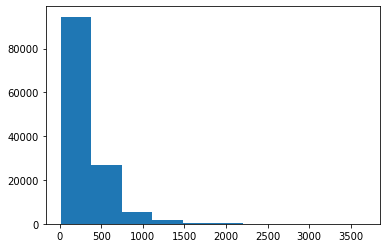

In [142]:
import matplotlib.pyplot as plt

plt.hist(l)

In [154]:
le=0
for i in range(len(df1['transcript'])):
    if (len(df1['transcript'][i]))<=310:
        le = le + 1
    else:
        continue
print('From total',format(len(df1['transcript'])),'rows',((le)), 'are less than 310')

From total 129227 rows 81539 are less than 310


In [152]:
print(df['transcript'][0])
print(df1['transcript'][0])

morning calling popsicle benefit center sam help today say procedure done near future wanna make certain gonna covered insurance relax already called health carrier regarding know iraq verify health insurance verify covered need call health carrier see perceived terribly cover live employee provide last name donald fax empire last digit social zip code lastly data alright donnell see end medical insurance toe eighty know care number covered medical insurance radiator girl correct phone number united health care number partner wife wanna wear shoe paper handy bert berkshire call great day stay safe
[187, 19, 4600, 12, 59, 665, 26, 32, 37, 1383, 141, 1283, 592, 60, 34, 529, 20, 224, 33, 4727, 57, 102, 50, 337, 114, 2, 1781, 93, 50, 33, 93, 224, 9, 3, 50, 337, 4, 7081, 6016, 267, 424, 139, 104, 15, 10, 2006, 314, 6296, 15, 195, 105, 296, 120, 966, 413, 17, 4119, 4, 116, 40, 33, 5121, 384, 2, 56, 6, 224, 40, 33, 10419, 672, 31, 25, 6, 170, 50, 56, 6, 731, 222, 60, 2164, 1421, 293, 1281, 25

In [153]:
max_length = 310
X= pad_sequences(df1['transcript'], maxlen=max_length, padding='pre', truncating='pre')

In [155]:
(X[0])

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [156]:
print(len(df1['transcript'][0]))
print(len(X[0]))

print(len(df1['transcript'][45]))
print(len(X[45]))

print(len(df1['transcript'][70]))
print(len(X[70]))

92
310
91
310
142
310


In [157]:
y=df1['primary driver'].copy()

In [158]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y.values)

In [159]:
y.shape

(129227,)

In [160]:
#Train test split of data without sampling

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=51)

In [161]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(116304, 310) (116304,)
(12923, 310) (12923,)


In [171]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=31)
Xs, ys = sm.fit_resample(X_train, y_train)

In [172]:
import numpy as np

unique1, counts1 = np.unique(ys, return_counts=True)

np.asarray((unique1, counts1)).T

array([[    0, 12675],
       [    1, 12675],
       [    2, 12675],
       [    3, 12675],
       [    4, 12675],
       [    5, 12675],
       [    6, 12675],
       [    7, 12675],
       [    8, 12675],
       [    9, 12675],
       [   10, 12675],
       [   11, 12675],
       [   12, 12675],
       [   13, 12675],
       [   14, 12675],
       [   15, 12675],
       [   16, 12675],
       [   17, 12675],
       [   18, 12675],
       [   19, 12675],
       [   20, 12675],
       [   21, 12675],
       [   22, 12675],
       [   23, 12675],
       [   24, 12675],
       [   25, 12675],
       [   26, 12675],
       [   27, 12675],
       [   28, 12675],
       [   29, 12675],
       [   30, 12675],
       [   31, 12675],
       [   32, 12675],
       [   33, 12675],
       [   34, 12675],
       [   35, 12675],
       [   36, 12675],
       [   37, 12675],
       [   38, 12675],
       [   39, 12675],
       [   40, 12675],
       [   41, 12675],
       [   42, 12675],
       [   

In [174]:
Xs[415]

array([   22,   468,   432,   214,  1723,    84,    59,    19,    84,
         530,    38,  1438,  3146,   336,   365,  2084,     3,  1215,
         313,   181,    21,   291,   103,    72,   178,  1723,    84,
         530,   136,  1216,   609,   470,     3,   372,   399,    22,
         468,   432,     3,  2836,    84,    59,  1723,    84,   530,
          38,  1438,  3146,  2237,   365,  2084,     3,  1215,   313,
         181,    21,   103,    72,   178,  1723,    84,   530,   136,
        1216,   609,   470,     3,   372,   399,    22,   468,   432,
         214,  1723,    84,    59,    19,    84,   530,    38,  1438,
        3146,   336,   365,  2084,     3,  1215,   313,   181,    21,
         291,   103,    72,   178,  1723,    84,   530,   136,  1216,
         609,   470,     3,   372,   399,    22,   468,   432,   214,
           3,    74,    84,    59,  1723,    84,   530,    38,  1438,
        3146,   336,   365,  2084,     3,  1215,   313,   181,    21,
         291,   103,

In [175]:
Xs

array([[   0,    0,    0, ...,   10,  620,  907],
       [ 109,  557,   79, ...,  816,   66,   13],
       [   0,    0,    0, ...,  142,    3, 3852],
       ...,
       [ 942, 2478,  166, ...,  349,   71,   41],
       [   0,    0,    0, ...,  793,  371, 1314],
       [ 255,  354,  458, ...,   16,   20,  423]], dtype=int32)

In [181]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(Xs)
Xs=transformer.transform(Xs)


In [182]:
Xs[415]

array([ 5.64102564e-01,  1.20000000e+01,  1.08000000e+01,  5.48717949e+00,
        3.82888889e+01,  1.86666667e+00,  1.34090909e+00,  4.22222222e-01,
        1.86666667e+00,  1.12765957e+01,  8.26086957e-01,  2.87600000e+01,
        6.55416667e+01,  6.85714286e+00,  7.15686275e+00,  4.16800000e+01,
        5.88235294e-02,  2.43000000e+01,  6.13725490e+00,  3.35185185e+00,
        4.11764706e-01,  5.49056604e+00,  1.77586207e+00,  1.30909091e+00,
        2.91803279e+00,  2.87166667e+01,  1.40000000e+00,  9.29824561e+00,
        2.26666667e+00,  1.99344262e+01,  9.51562500e+00,  7.23076923e+00,
        4.68750000e-02,  5.81250000e+00,  5.78260870e+00,  3.28358209e-01,
        6.24000000e+00,  5.91780822e+00,  4.34782609e-02,  3.83243243e+01,
        1.13513514e+00,  7.76315789e-01,  2.32837838e+01,  1.10526316e+00,
        6.62500000e+00,  4.87179487e-01,  1.82025316e+01,  3.93250000e+01,
        2.60116279e+01,  4.24418605e+00,  2.45176471e+01,  3.44827586e-02,
        1.41279070e+01,  

In [183]:
Xs

array([[ 0.        ,  0.        ,  0.        , ..., -0.37882353,
         1.17894737,  1.70678337],
       [ 2.79487179, 14.28205128,  1.975     , ...,  1.51764706,
        -0.27894737, -0.24945295],
       [ 0.        ,  0.        ,  0.        , ..., -0.06823529,
        -0.44473684,  8.15098468],
       ...,
       [24.15384615, 63.53846154,  4.15      , ...,  0.41882353,
        -0.26578947, -0.18818381],
       [ 0.        ,  0.        ,  0.        , ...,  1.46352941,
         0.52368421,  2.59737418],
       [ 6.53846154,  9.07692308, 11.45      , ..., -0.36470588,
        -0.4       ,  0.64770241]])

In [184]:
#Datframe using over sampled training data

print("Shape of over smaple : X:",Xs.shape,"y:",ys.shape)
Sampled_df= pd.DataFrame(Xs)


Shape of over smaple : X: (1090050, 310) y: (1090050,)


In [186]:
Sampled_df['y_train1']=ys

In [187]:
Sampled_df['y_train1'].nunique()

86

In [188]:
print(Xs[2],ys[2])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [189]:
Sampled_df['y_train1'].value_counts()

85    12675
31    12675
23    12675
24    12675
25    12675
      ...  
58    12675
59    12675
60    12675
61    12675
0     12675
Name: y_train1, Length: 86, dtype: int64

In [190]:
Sampled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,y_train1
0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.236842,0.007407,-0.300781,0.745370,-0.154545,-0.241379,-0.378824,1.178947,1.706783,47
1,2.794872,14.282051,1.975,2.102564,20.266667,23.444444,1.386364,0.844444,29.666667,0.808511,...,-0.340081,-0.335185,-0.316406,11.076389,1.509091,-0.339901,1.517647,-0.278947,-0.249453,69
2,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.236842,-0.333333,0.736328,0.108796,-0.165909,-0.261084,-0.068235,-0.444737,8.150985,69
3,3.384615,8.205128,0.725,2.538462,0.844444,3.044444,29.772727,7.111111,38.200000,890.042553,...,-0.319838,10.003704,-0.300781,0.974537,3.381818,0.500000,-0.371765,-0.350000,-0.155361,5
4,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.194332,-0.198148,-0.332031,0.067130,0.836364,-0.293103,0.618824,1.571053,0.076586,29


In [191]:
Sampled_df.shape

(1090050, 311)

In [192]:
Sampled_df=Sampled_df.groupby('y_train1').head(8000).sample(frac=1).reset_index(drop=True)

In [193]:
Sampled_df.shape

(688000, 311)

In [194]:
X_train1=Sampled_df.iloc[:,:-1]

In [195]:
y_train1=Sampled_df['y_train1']

In [196]:
print('X_train1:',X_train1.shape,'y_train1:', y_train1.shape)

X_train1: (688000, 310) y_train1: (688000,)


In [ ]:
#Frequency of Labels = 1000


from tensorflow.keras import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model1=Sequential()
model1.add(Embedding(input_dim=vocab_size,output_dim=110,input_length=max_length))
model1.add(Bidirectional(LSTM(150,return_sequences=True)))
model1.add(Bidirectional(LSTM(150)))
model1.add(Dropout(0.50))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(86,activation='softmax'))
model1.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])
model1.summary()

EPOCHS = 55
batch_size = 64

history1 = model1.fit(X_train1,y_train1, epochs = EPOCHS,batch_size = batch_size,validation_split=0.15,callbacks=[es, mc])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 310, 110)          6050000   
_________________________________________________________________
bidirectional (Bidirectional (None, 310, 300)          313200    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               541200    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               30100     
_________________________________________________________________
dense_1 (Dense)              (None, 86)                8686      
Total params: 6,943,186
Trainable params: 6,943,186
Non-trainable params: 0
______________________________________________

In [ ]:
print('Model completed')

In [ ]:
history1.save("model_86_lstm.h5")
model1.save('model1_86_lstm.h5')
print("Saved model to disk")

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(Embedding(55000,110,input_length=max_length))
model2.add(SpatialDropout1D(0.3))
model2.add(LSTM(150,dropout = 0.3, recurrent_dropout = 0.3))
model2.add(Dense(86,activation = "softmax"))
model2.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])
model2.summary()

EPOCHS = 60
batch_size = 32

history2 = model2.fit(X_train1,y_train1, epochs = EPOCHS,batch_size = batch_size,validation_split=0.1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 380, 110)          6050000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 380, 110)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 150)               156600    
_________________________________________________________________
dense_4 (Dense)              (None, 86)                12986     
Total params: 6,219,586
Trainable params: 6,219,586
Non-trainable params: 0
_________________________________________________________________
Train on 619200 samples, validate on 68800 samples
Epoch 1/60
619200/619200 [==============================] - 9992s 16ms/sample - loss: 3.9588 - accuracy: 0.1027 - val_loss: 3.5406 - val_accuracy: 0.1918
Epoch 2/60
619200/619200 [===========

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential()
model1.add(Embedding(55000,110,input_length = 400))
model1.add(SpatialDropout1D(0.3))
model1.add(LSTM(150,dropout = 0.3, recurrent_dropout = 0.3))
model1.add(Dense(51,activation = "softmax"))
model1.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])
model1.summary()

EPOCHS = 55
batch_size = 32

history1 = model1.fit(X_train1,y_train1, epochs = EPOCHS,batch_size = batch_size,validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 110)          6050000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 400, 110)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 150)               156600    
_________________________________________________________________
dense (Dense)                (None, 51)                7701      
Total params: 6,214,301
Trainable params: 6,214,301
Non-trainable params: 0
_________________________________________________________________
Train on 165240 samples, validate on 18360 samples
Epoch 1/55
165240/165240 [==============================] - 2697s 16ms/sample - loss: 3.4695 - accuracy: 0.1141 - val_loss: 3.1018 - val_accuracy: 0.2087
Epoch 2/55
165240/165240 [=============

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential()
model1.add(Embedding(55000,100,input_length = 400))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(150,dropout = 0.2, recurrent_dropout = 0.2))
model1.add(Dense(51,activation = "softmax"))
model1.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])
model1.summary()

EPOCHS = 55
batch_size = 64

history1 = model1.fit(X_train1,y_train1, epochs = EPOCHS,batch_size = batch_size,validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          5500000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 150)               150600    
_________________________________________________________________
dense (Dense)                (None, 51)                7701      
Total params: 5,658,301
Trainable params: 5,658,301
Non-trainable params: 0
_________________________________________________________________
Train on 160650 samples, validate on 17850 samples
Epoch 1/55
160650/160650 [==============================] - 938s 6ms/sample - loss: 3.5430 - accuracy: 0.0933 - val_loss: 3.2880 - val_accuracy: 0.1586
Epoch 2/55
160650/160650 [===============

In [ ]:
#Model with over sampled data


from tensorflow.keras import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping



embedding_dim=100
model1 = Sequential()
model1.add(Embedding(vocab_size,embedding_dim,input_length = X.shape[1]))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100,dropout = 0.2, recurrent_dropout = 0.2))
model1.add(Dense(51,activation = "softmax"))
model1.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

EPOCHS = 50
batch_size = 64

history1 = model1.fit(X_train1,y_train1, epochs = EPOCHS,batch_size = batch_size,validation_split=0.1)

Train on 183600 samples, validate on 20400 samples
Epoch 1/50
183600/183600 [==============================] - 1128s 6ms/sample - loss: 3.5564 - accuracy: 0.0913 - val_loss: 3.3341 - val_accuracy: 0.1497
Epoch 2/50
183600/183600 [==============================] - 1126s 6ms/sample - loss: 3.1692 - accuracy: 0.1904 - val_loss: 2.9618 - val_accuracy: 0.2485
Epoch 3/50
183600/183600 [==============================] - 1124s 6ms/sample - loss: 2.8791 - accuracy: 0.2663 - val_loss: 2.7117 - val_accuracy: 0.3082
Epoch 4/50
183600/183600 [==============================] - 1123s 6ms/sample - loss: 2.6847 - accuracy: 0.3143 - val_loss: 2.5529 - val_accuracy: 0.3468
Epoch 5/50
183600/183600 [==============================] - 1123s 6ms/sample - loss: 2.5330 - accuracy: 0.3519 - val_loss: 2.4226 - val_accuracy: 0.3821
Epoch 6/50
183600/183600 [==============================] - 1121s 6ms/sample - loss: 2.3984 - accuracy: 0.3849 - val_loss: 2.3174 - val_accuracy: 0.4081
Epoch 7/50
183600/183600 [=====

In [47]:
#Model without over sampled data

from tensorflow.keras import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim=100
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(98,activation = "softmax"))
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

EPOCHS = 50
batch_size = 64

history = model.fit(X_train,y_train, epochs = EPOCHS,batch_size = batch_size,validation_split=0.1)

Train on 51460 samples, validate on 5718 samples
Epoch 1/50
51460/51460 [==============================] - 314s 6ms/sample - loss: 2.7696 - accuracy: 0.2551 - val_loss: 2.5387 - val_accuracy: 0.3171
Epoch 2/50
51460/51460 [==============================] - 311s 6ms/sample - loss: 2.2964 - accuracy: 0.3822 - val_loss: 2.0497 - val_accuracy: 0.4598
Epoch 3/50
51460/51460 [==============================] - 311s 6ms/sample - loss: 1.9432 - accuracy: 0.4772 - val_loss: 1.8600 - val_accuracy: 0.4951
Epoch 4/50
51460/51460 [==============================] - 311s 6ms/sample - loss: 1.7220 - accuracy: 0.5267 - val_loss: 1.6952 - val_accuracy: 0.5421
Epoch 5/50
51460/51460 [==============================] - 311s 6ms/sample - loss: 1.5505 - accuracy: 0.5712 - val_loss: 1.6091 - val_accuracy: 0.5624
Epoch 6/50
51460/51460 [==============================] - 311s 6ms/sample - loss: 1.4095 - accuracy: 0.6038 - val_loss: 1.5741 - val_accuracy: 0.5654
Epoch 7/50
51460/51460 [===========================

KeyboardInterrupt: 